In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'retina'
from setup import *

Extracting data from ../Data/behavior_free_swimming.tar.gz...
Extracting models from ../Models/hmms_20240125.tar.gz...
Extracting models from ../Models/longtrajectories_20240202.tar.gz...


In [3]:
COLORS = {
    "mc":"black",
    "hmm3":"orange",
    "gen":"purple",
}

# Figure

## Panel : all temperatures - all qs

In [4]:
qs = np.arange(8)

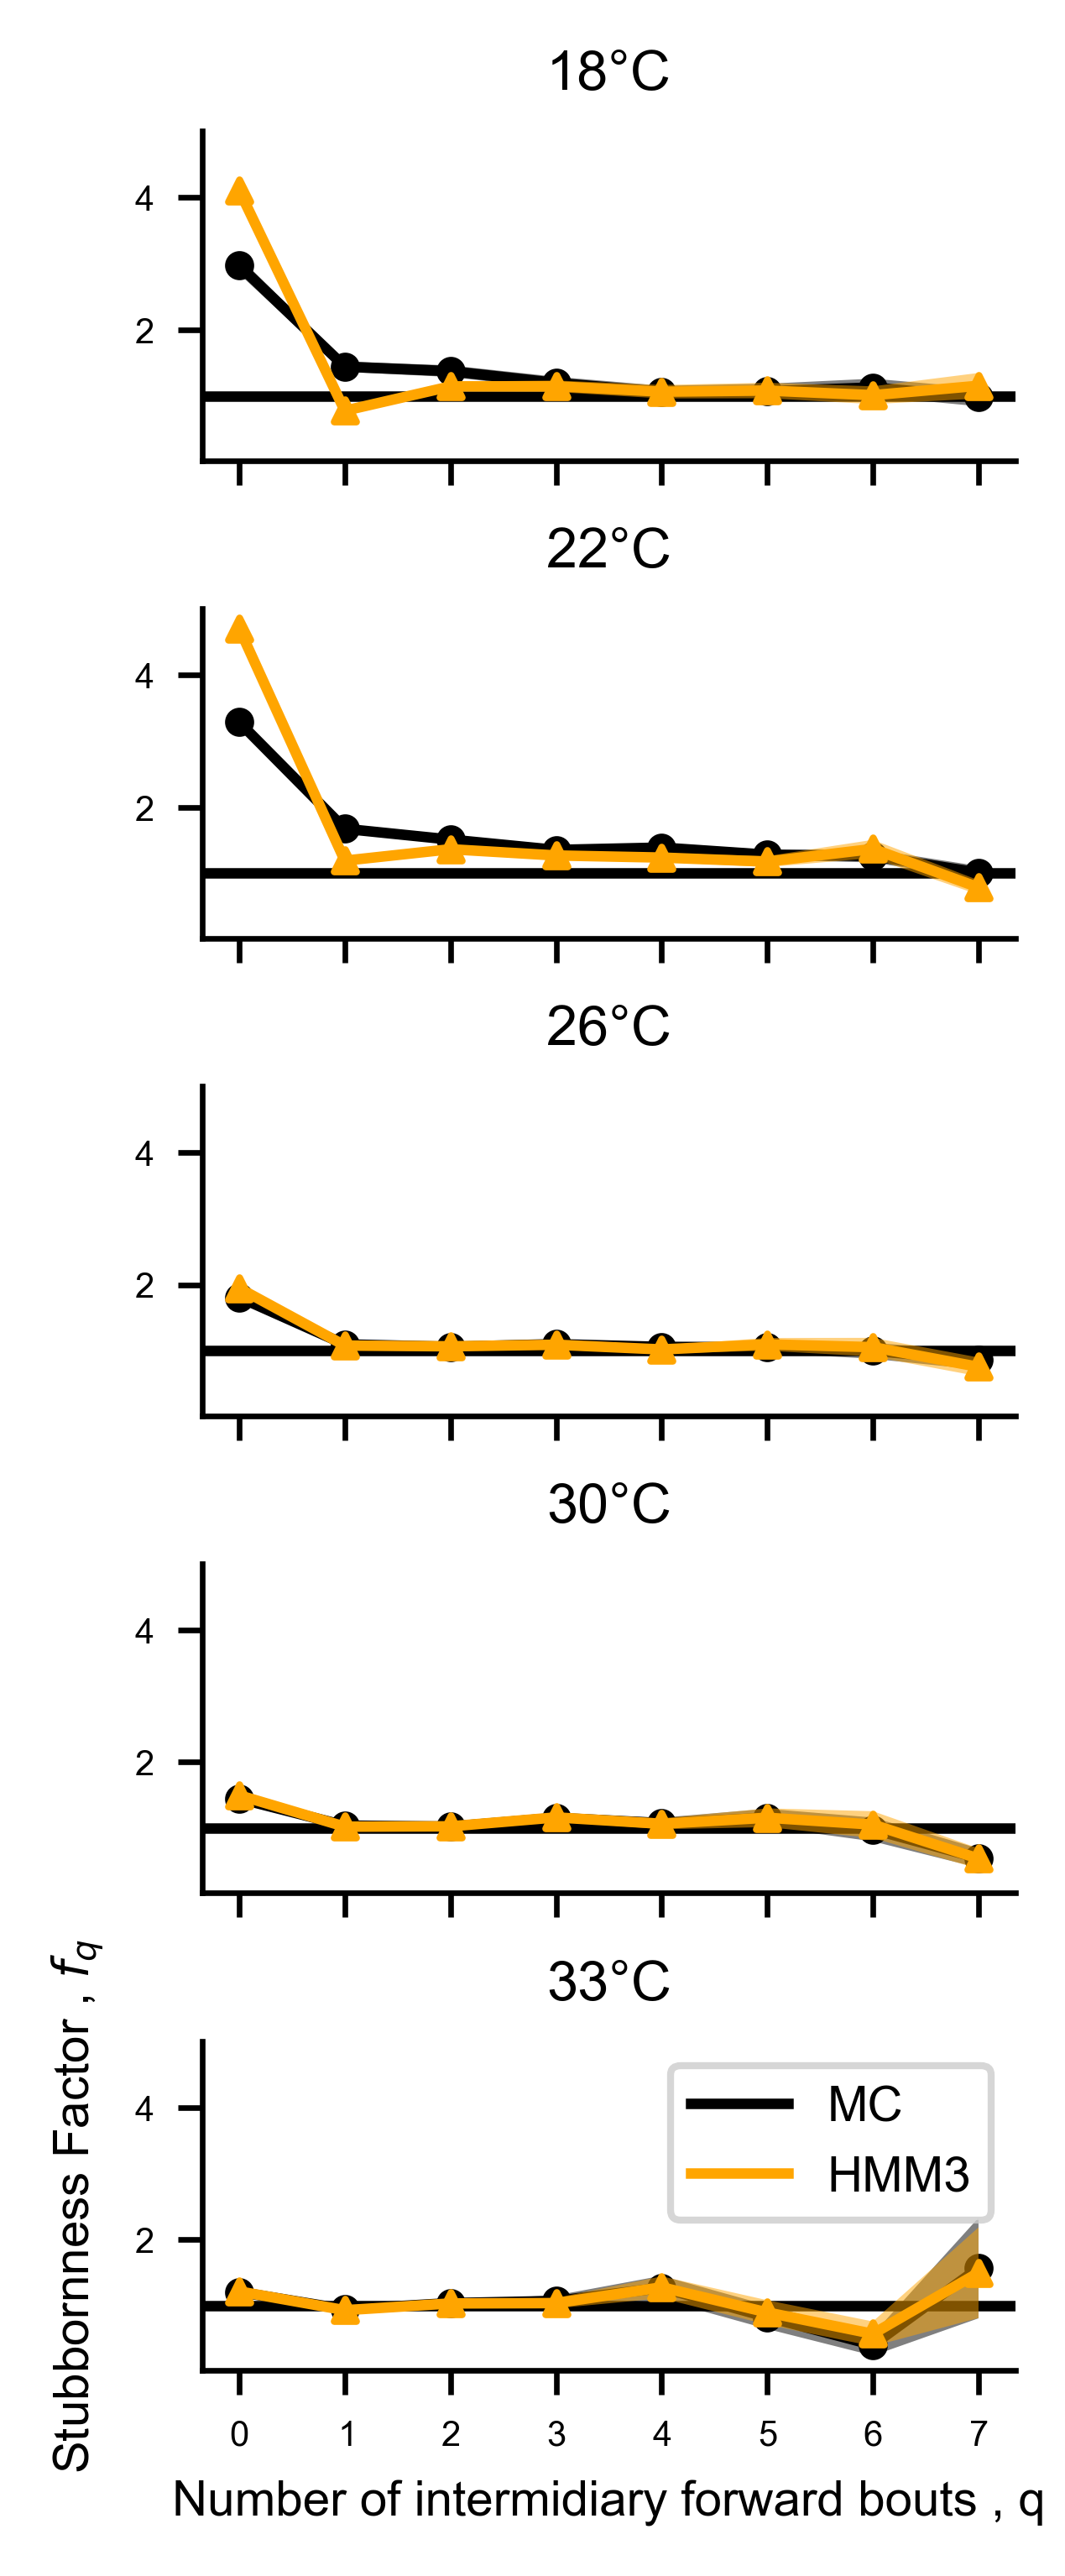

In [8]:
fig, axs = plt.subplots(nrows=len(TEMPS), figsize=(2*1,len(TEMPS)*1), sharex=True, sharey=True)
for ax, temp in zip(axs,TEMPS):
    Fs_mc, Fs_hmm3 = [], []
    for q in qs:
        seqs = MC.threshold_classifier(load_sequences(DATAPATH, temp), -DTHETA_THRESH, +DTHETA_THRESH)
        centered = MC.center_bouts(seqs)
        Fs_mc.append(MC.stubbornness_factor(centered, q=q))
        seqs = load_viterbi(MODELPATH, "g3", temp)
        centered = MC.center_bouts(seqs)
        Fs_hmm3.append(MC.stubbornness_factor(centered, q=q))
    Fs_mc = np.array(Fs_mc)
    Fs_hmm3 = np.array(Fs_hmm3)
    ax.scatter(qs, Fs_mc[:,0], marker="o", s=10, zorder=2, color=COLORS["mc"])
    ax.plot(qs, Fs_mc[:,0], zorder=1, color=COLORS["mc"], label="MC")
    ax.fill_between(qs, Fs_mc[:,0]-Fs_mc[:,1], Fs_mc[:,0]+Fs_mc[:,1], zorder=0, color=COLORS["mc"], alpha=0.5, edgecolor=None)

    ax.scatter(qs, Fs_hmm3[:,0], marker="^", s=10, zorder=5, color=COLORS["hmm3"])
    ax.plot(qs, Fs_hmm3[:,0], zorder=4, color=COLORS["hmm3"], label="HMM3")
    ax.fill_between(qs, Fs_hmm3[:,0]-Fs_hmm3[:,1], Fs_hmm3[:,0]+Fs_hmm3[:,1], zorder=3, color=COLORS["hmm3"], alpha=0.5, edgecolor=None)

    ax.axhline(1)
    ax.set_xticks(qs)
    ax.set_title(f"{temp}°C")

ax.set_xlabel("Number of intermidiary forward bouts , q")
ax.set_ylabel(r"Stubbornness Factor , $f_{q}$")
ax.legend()

fig.savefig("panels/Fig4/Stubbs.svg")

# Supplementaries

## All temps - q=0

In [9]:
q = 0
Fs_mc, Fs_hmm3 = [], []
for temp in TEMPS:
    seqs = MC.threshold_classifier(load_sequences(DATAPATH, temp), -DTHETA_THRESH, +DTHETA_THRESH)
    centered = MC.center_bouts(seqs)
    Fs_mc.append(MC.stubbornness_factor(centered, q=q))
    
    seqs = load_viterbi(MODELPATH, "g3", temp)
    centered = MC.center_bouts(seqs)
    Fs_hmm3.append(MC.stubbornness_factor(centered, q=q))

Fs_mc = np.array(Fs_mc)
Fs_hmm3 = np.array(Fs_hmm3)

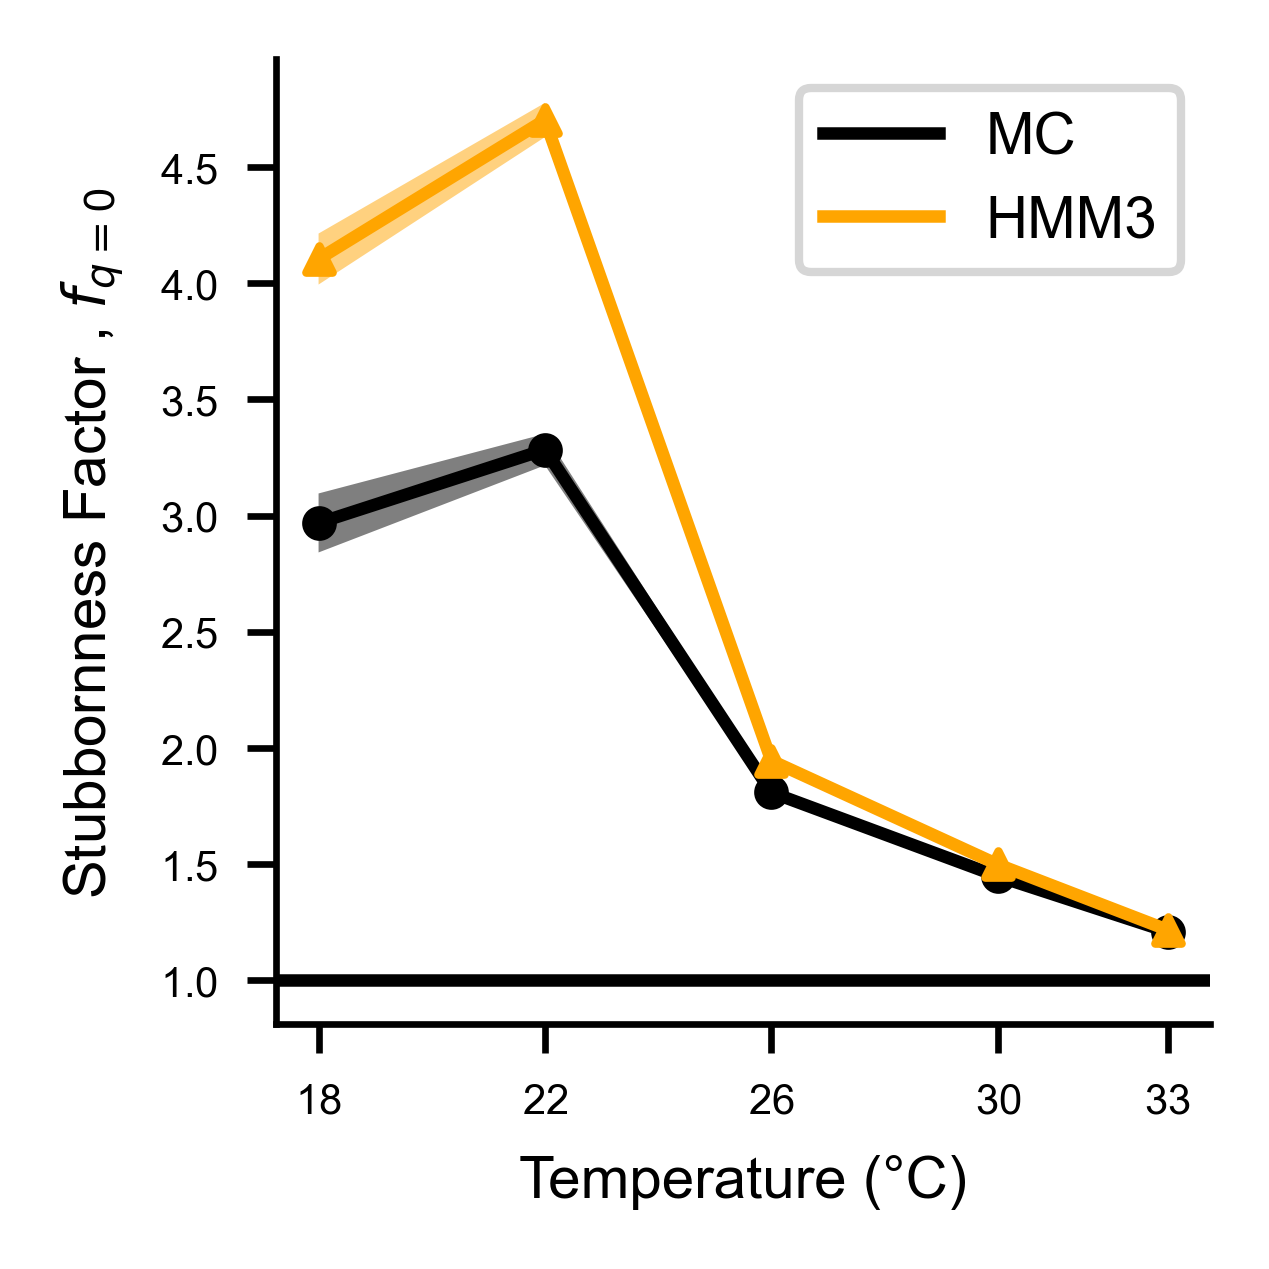

In [11]:
fig, ax = plt.subplots()

ax.scatter(TEMPS, Fs_mc[:,0], marker="o", s=10, zorder=2, color=COLORS["mc"])
ax.plot(TEMPS, Fs_mc[:,0], zorder=1, color=COLORS["mc"], label="MC")
ax.fill_between(TEMPS, Fs_mc[:,0]-Fs_mc[:,1], Fs_mc[:,0]+Fs_mc[:,1], zorder=0, color=COLORS["mc"], alpha=0.5, edgecolor=None)

ax.scatter(TEMPS, Fs_hmm3[:,0], marker="^", s=10, zorder=5, color=COLORS["hmm3"])
ax.plot(TEMPS, Fs_hmm3[:,0], zorder=4, color=COLORS["hmm3"], label="HMM3")
ax.fill_between(TEMPS, Fs_hmm3[:,0]-Fs_hmm3[:,1], Fs_hmm3[:,0]+Fs_hmm3[:,1], zorder=3, color=COLORS["hmm3"], alpha=0.5, edgecolor=None)

ax.axhline(1)
ax.set_xticks(TEMPS)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel(r"Stubbornness Factor , $f_{q=0}$")
ax.legend()
fig.savefig("panels/Fig4/supps/Stubb_MC_HMM3_q0.svg")

## All temps - q=1

In [12]:
q = 1
Fs_mc, Fs_hmm3 = [], []
for temp in TEMPS:
    seqs = MC.threshold_classifier(load_sequences(DATAPATH, temp), -DTHETA_THRESH, +DTHETA_THRESH)
    centered = MC.center_bouts(seqs)
    Fs_mc.append(MC.stubbornness_factor(centered, q=q))
    
    seqs = load_viterbi(MODELPATH, "g3", temp)
    centered = MC.center_bouts(seqs)
    Fs_hmm3.append(MC.stubbornness_factor(centered, q=q))

Fs_mc = np.array(Fs_mc)
Fs_hmm3 = np.array(Fs_hmm3)

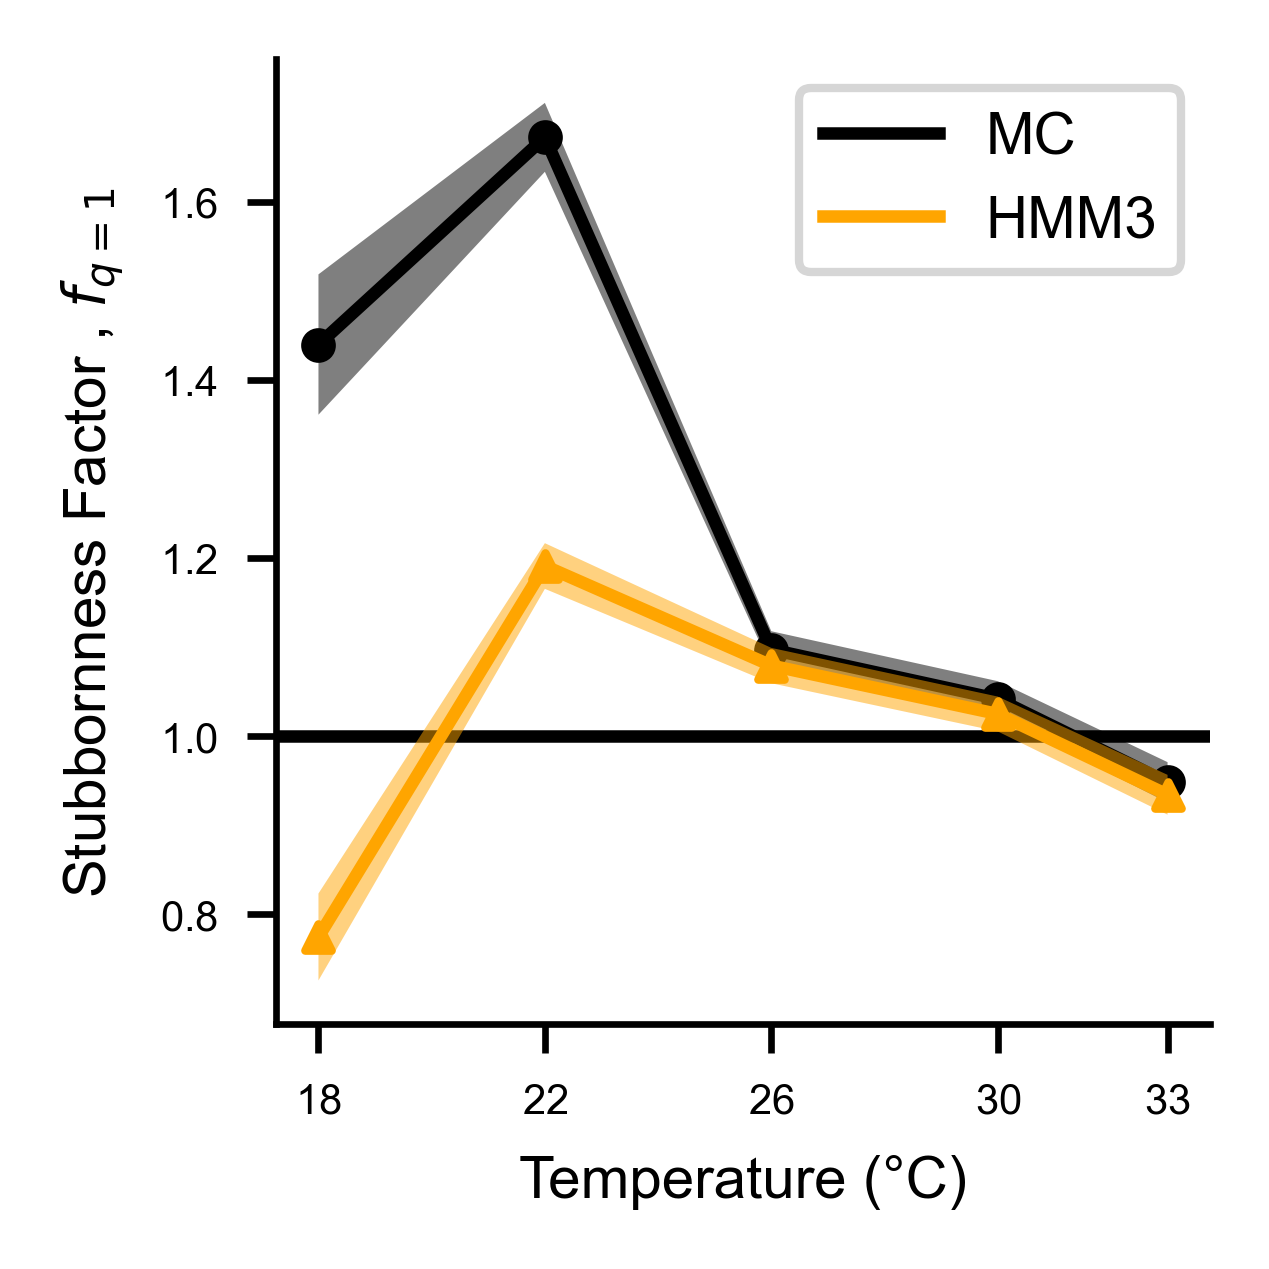

In [14]:
fig, ax = plt.subplots()

ax.scatter(TEMPS, Fs_mc[:,0], marker="o", s=10, zorder=2, color=COLORS["mc"])
ax.plot(TEMPS, Fs_mc[:,0], zorder=1, color=COLORS["mc"], label="MC")
ax.fill_between(TEMPS, Fs_mc[:,0]-Fs_mc[:,1], Fs_mc[:,0]+Fs_mc[:,1], zorder=0, color=COLORS["mc"], alpha=0.5, edgecolor=None)

ax.scatter(TEMPS, Fs_hmm3[:,0], marker="^", s=10, zorder=5, color=COLORS["hmm3"])
ax.plot(TEMPS, Fs_hmm3[:,0], zorder=4, color=COLORS["hmm3"], label="HMM3")
ax.fill_between(TEMPS, Fs_hmm3[:,0]-Fs_hmm3[:,1], Fs_hmm3[:,0]+Fs_hmm3[:,1], zorder=3, color=COLORS["hmm3"], alpha=0.5, edgecolor=None)

#ax.plot(TEMPS, Fs_gen[:,0], zorder=1, color=COLORS["gen"], label="GEN")
#ax.fill_between(TEMPS, Fs_gen[:,0]-Fs_gen[:,1], Fs_gen[:,0]+Fs_gen[:,1], zorder=0, color=COLORS["gen"], alpha=0.5, edgecolor=None)

ax.axhline(1)
ax.set_xticks(TEMPS)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel(r"Stubbornness Factor , $f_{q=1}$")
ax.legend()
fig.savefig("panels/Fig4/supps/Stubb_MC_HMM3_q1.svg")